# Đường viền trong OpenCV

Contours (đường bao) trong xử lý ảnh là các đường cong nối các điểm liên tiếp có cùng giá trị cường độ (thường là biên của các đối tượng trong ảnh). Nói cách khác, contour là đường viền khép kín bao quanh một vùng có cùng đặc trưng (ví dụ: cùng màu hoặc cùng mức xám).

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
image = cv2.imread("images/violet.jpg", cv2.IMREAD_GRAYSCALE)
# Làm rõ cạnh
image_canny = cv2.Canny(image, 100, 150)
# Tìm tọa độ cạnh (contours)
contours, hierarchy = cv2.findContours(image_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

## Mục tiêu

Trong hướng dẫn này, bạn sẽ học cách:

- Sử dụng hàm OpenCV `findContours()`
- Sử dụng hàm OpenCV `drawContours()`

### Tìm kiếm Contours

#### Cú pháp hàm
```python
contours, hierarchy = cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```
Hàm có 3 đối số bắt buộc:

1. `image`: Ảnh đầu vào (ảnh nhị phân, mảng numpy, chỉ nhận ảnh 1 kênh).
2. `mode`: Chế độ tìm contour (ví dụ: `cv2.RETR_EXTERNAL`, `cv2.RETR_TREE`, ...).
3. `method`: Phương pháp lấy điểm contour (ví dụ: `cv2.CHAIN_APPROX_SIMPLE`, `cv2.CHAIN_APPROX_NONE`, ...).

Giải thích:
- `contours`: Danh sách các contour tìm được (tùy chọn, dùng khi cập nhật).
- `hierarchy`: Thông tin phân cấp các contour (tùy chọn).
- `offset`: Dịch chuyển điểm contour (tùy chọn).

Kết quả trả về:
- `contours`: Danh sách các contour (mỗi contour là một mảng điểm).
- `hierarchy`: Mảng phân cấp các contour.

In [7]:
# Tìm tọa độ cạnh (contours)
contours, hierarchy = cv2.findContours(image_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

### Biểu diễn các Countours lên ảnh

#### Cú pháp hàm 
```python
dst = cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]])
```
Hàm có **4 đối số bắt buộc**:
1. `image`: Ảnh đầu vào (mảng numpy) mà bạn muốn vẽ contour lên.
2. `contours`: Danh sách các contour (thường lấy từ cv2.findContours).
3. `contourIdx`: Chỉ số contour cần vẽ (nếu là -1 sẽ vẽ tất cả contour).
4. `color`: Màu vẽ contour (dạng tuple, ví dụ: (0,255,0) cho màu xanh lá).

Giải thích:
- `dst`: Ảnh đầu ra
- `thickness`: Độ dày đường vẽ (mặc định là 1, nếu là -1 sẽ tô kín).
- `lineType`: Kiểu đường vẽ (mặc định là 8-connected).
- `hierarchy`, `maxLevel`, `offset`: Các tham số nâng cao cho vẽ contour phân cấp.

In [8]:
# Tạo ảnh trắng
white_image = np.ones(image.shape, dtype=np.uint8) * 254
# Thể hiện lên ảnh
cv2.drawContours(white_image, contours, -1, (0, 0, 0))

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

### Kết quả

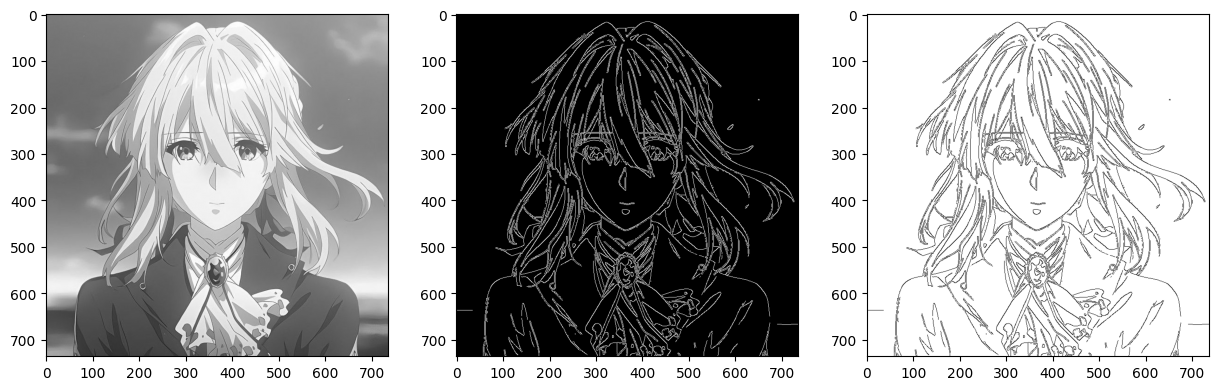

In [11]:
# Hiển thị
plt.figure(figsize=[15, 5])
plt.subplot(131); plt.imshow(image, cmap='gray')
plt.subplot(132); plt.imshow(image_canny, cmap='gray')
plt.subplot(133); plt.imshow(white_image, cmap='gray')


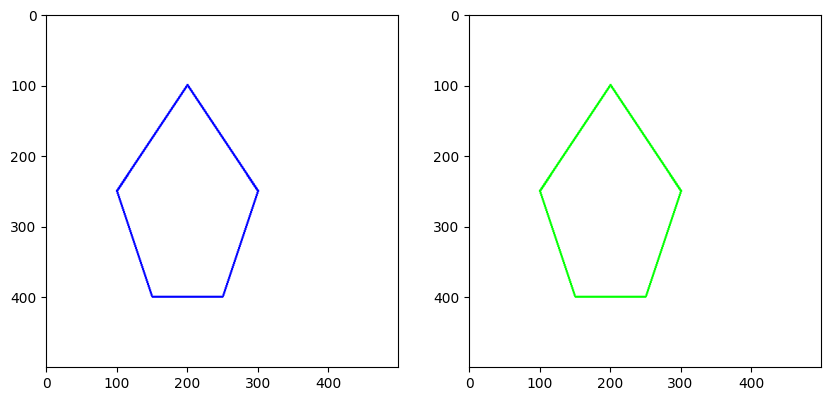

In [10]:
# Tạo ảnh trắng
img1 = np.ones((500, 500, 3), dtype=np.uint8) * 255
img2 = img1.copy()
# Tạo vài điểm dạng ngôi sao
pts = np.array([[100,250], [200,100], [300,250], [250,400], [150,400]], np.int32)
pts = pts.reshape((-1,1,2))

# Vẽ contour ban đầu (nối các điểm)
cv2.polylines(img1, [pts], isClosed=True, color=(0,0,255), thickness=2)

# Tính convex hull
hull = cv2.convexHull(pts)

# Vẽ convex hull
cv2.polylines(img2, [hull], isClosed=True, color=(0,255,0), thickness=2)

# Hiển thị
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2)